<a href="https://colab.research.google.com/github/Anshika444/Mini-Project/blob/main/DS_MINOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

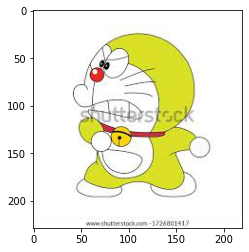

In [53]:
img=imread('/content/drive/MyDrive/images/Doraemon/24.jpg')
plt.imshow(img)

In [55]:
img.shape

(229, 220, 3)

In [56]:
import os
import numpy as np

datadir='/content/drive/MyDrive/images'
flat=[]
target=[]
catagory=['Doraemon','Shinchan','Ninja']
for i in catagory:
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    array=imread(os.path.join(path,img))
    img_resize=resize(array,(100,100,3))
    flat.append(np.ndarray.flatten(img_resize))
    target.append(i)
flat=np.array(flat)
target=np.array(target)
    


In [57]:
df=pd.DataFrame(flat)
df['Target']=target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,29961,29962,29963,29964,29965,29966,29967,29968,29969,29970,29971,29972,29973,29974,29975,29976,29977,29978,29979,29980,29981,29982,29983,29984,29985,29986,29987,29988,29989,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999,Target
0,0.108497,0.749020,0.971242,0.108497,0.749020,0.971242,0.109069,0.749020,0.971242,0.108497,0.749020,0.971242,0.108497,0.749020,0.971242,0.108497,0.749020,0.971242,0.108497,0.749020,0.971242,0.108497,0.749020,0.971242,0.109788,0.749020,0.971242,0.108497,0.749020,0.971242,0.108497,0.749020,0.971242,0.108497,0.749020,0.971242,0.108497,0.749020,0.971242,0.108497,...,0.108497,0.749020,0.971242,0.108497,0.749020,0.971242,0.108497,0.749020,0.971242,0.108497,0.749020,0.971242,0.109788,0.749020,0.971242,0.108497,0.749020,0.971242,0.108497,0.749020,0.971242,0.108497,0.749020,0.971242,0.108497,0.749020,0.971242,0.108497,0.749020,0.971242,0.109069,0.749020,0.971242,0.108497,0.749020,0.971242,0.108497,0.749020,0.971242,Doraemon
1,0.988235,0.988235,0.994771,0.988235,0.988235,0.994771,0.988235,0.988235,0.994771,0.988235,0.988235,0.994771,0.988235,0.988235,0.994771,0.988235,0.988235,0.994771,0.988235,0.988235,0.994771,0.988235,0.988235,0.994771,0.988235,0.988235,0.994771,0.988235,0.988235,0.994771,0.988235,0.988235,0.994771,0.988235,0.988235,0.994771,0.988235,0.988235,0.994771,0.988235,...,0.988235,0.988235,0.994771,0.988235,0.988235,0.994771,0.988235,0.988235,0.994771,0.988235,0.988235,0.994771,0.988235,0.988235,0.994771,0.988235,0.988235,0.994771,0.988235,0.988235,0.994771,0.988235,0.988235,0.994771,0.988235,0.988235,0.994771,0.988235,0.988235,0.994771,0.988235,0.988235,0.994771,0.988235,0.988235,0.994771,0.988235,0.988235,0.994771,Doraemon
2,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,Doraemon
3,0.556471,0.858627,0.968627,0.552765,0.854922,0.968627,0.546260,0.852451,0.966289,0.535255,0.849980,0.964510,0.522471,0.846863,0.961399,0.513608,0.846863,0.960784,0.504568,0.842941,0.960766,0.494662,0.840098,0.957887,0.484490,0.839020,0.956793,0.478098,0.839020,0.956667,0.463863,0.839020,0.956667,0.461392,0.838059,0.952893,0.455000,0.831667,0.952745,0.446530,...,0.861152,0.882672,0.889020,0.879913,0.880283,0.880956,0.883546,0.881857,0.878176,0.890000,0.888428,0.880781,0.887218,0.885579,0.875403,0.876515,0.874892,0.862103,0.902099,0.900512,0.885022,0.907026,0.907451,0.885745,0.904647,0.906836,0.879549,0.901373,0.903570,0.873313,0.901289,0.899804,0.868627,0.908460,0.904146,0.889076,0.916895,0.912447,0.904604,Doraemon
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,Doraemon


In [58]:
x=flat
y=target

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [60]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['Shinchan', 'Shinchan', 'Doraemon', 'Shinchan', 'Shinchan',
       'Shinchan', 'Shinchan', 'Doraemon', 'Doraemon', 'Shinchan',
       'Shinchan', 'Shinchan', 'Shinchan', 'Shinchan', 'Shinchan',
       'Shinchan', 'Doraemon', 'Shinchan', 'Shinchan', 'Doraemon',
       'Doraemon'], dtype='<U8')

In [61]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_pred,y_test)
classification_report(y_pred,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n    Doraemon       0.17      0.17      0.17         6\n       Ninja       0.00      0.00      0.00         0\n    Shinchan       0.67      0.40      0.50        15\n\n    accuracy                           0.33        21\n   macro avg       0.28      0.19      0.22        21\nweighted avg       0.52      0.33      0.40        21\n'

In [62]:
!pip install streamlit
!pip install pyngrok

In [63]:
from pyngrok import ngrok

In [64]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
st.set_option('deprecation.showfileUploaderEncoding',False)
st.title('IMAGE CLASSIFIER')

Overwriting app.py


In [51]:
!nohup streamlit run app.py &
url=ngrok.connect(port='8501')
url

In [65]:
import pickle
pickle.dump(model,open('img_predict.p','wb'))
model=pickle.load(open('img_predict.p','rb'))

In [49]:
uploaded = st.file_("choose an image",type="jpg")
if uploaded is not None:
  img=Image.open(uploaded)
  st.image(img,caption='uploaded image')
  if st.button['Predict']:
    catagory=['Doraemon','Shinchan','Ninja']
    st.write['Result']
    flat=[]
    img_resize=resize(array,(100,100,3))
    flat.append(np.ndarray.flatten(img_resize))
    print(img_show)
    plt.imshow(img_resize)
    y_out=model.predict(flat)
    y_out=catagory[y_out[0]]
    st.write(f'OUTPUT:{y_out}')

NameError: ignored